<h1><i>Crop and Soil Health Monitoring using Random Forest</i></h1>

In [26]:
# Importing necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [3]:
# Load the dataset
df = pd.read_csv(r'C:\Users\Lenovo\Downloads\Crop and Soil Health.csv')
le_fert = LabelEncoder()
df['Fertilizer Name'] = le_fert.fit_transform(df['Fertilizer Name'])
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26.0,52.0,38.0,Sandy,Maize,37,0,0,6
1,29.0,52.0,45.0,Loamy,Sugarcane,12,0,36,5
2,34.0,65.0,62.0,Black,Cotton,7,9,30,1
3,32.0,62.0,34.0,Red,Tobacco,22,0,20,4
4,28.0,54.0,46.0,Clayey,Paddy,35,0,0,6


In [32]:
df.info()
df.head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temparature      8000 non-null   float64
 1   Humidity         8000 non-null   float64
 2   Moisture         8000 non-null   float64
 3   Soil Type        8000 non-null   int64  
 4   Crop Type        8000 non-null   int64  
 5   Nitrogen         8000 non-null   int64  
 6   Potassium        8000 non-null   int64  
 7   Phosphorous      8000 non-null   int64  
 8   Fertilizer Name  8000 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 562.6 KB


<bound method NDFrame.head of       Temparature  Humidity  Moisture  Soil Type  Crop Type  Nitrogen  \
0           26.00     52.00     38.00          4          3        37   
1           29.00     52.00     45.00          2          8        12   
2           34.00     65.00     62.00          0          1         7   
3           32.00     62.00     34.00          3          9        22   
4           28.00     54.00     46.00          1          6        35   
...           ...       ...       ...        ...        ...       ...   
7995        35.30     59.61     44.25          2          5        10   
7996        39.39     71.67     49.34          0          0        35   
7997        35.79     67.64     45.04          3          0        41   
7998        37.78     73.38     36.03          0          9        10   
7999        31.38     48.73     62.27          2          4        11   

      Potassium  Phosphorous  Fertilizer Name  
0             0            0                6

In [5]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Fertilizer Name
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,30.338895,59.210731,43.580862,18.429125,3.916375,18.512500,3.010000
std,4.478262,8.177366,12.596156,11.852406,5.494807,13.244113,2.010884
min,20.000000,40.020000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,27.050000,53.277500,33.967500,9.000000,0.000000,8.000000,1.000000
50%,30.240000,59.110000,42.250000,14.000000,1.000000,18.000000,3.000000
75%,33.460000,65.082500,52.950000,26.000000,5.000000,30.000000,5.000000
max,40.000000,80.000000,70.000000,46.000000,23.000000,46.000000,6.000000


In [6]:
df.shape

(8000, 9)

In [7]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
label_encoders ={}
for col in ['Soil Type','Crop Type','Fertilizer Name']:
    if df[col].dtype =='object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

In [10]:
df.columns

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [11]:
#feature and target selection
x = df[['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous']]
y = df['Fertilizer Name']

In [31]:
x.shape

(8000, 8)

In [13]:
y.shape

(8000,)

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
model = RandomForestClassifier(n_estimators=100,random_state=100)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=100)

In [16]:
y_pred = model.predict(x_test)

In [17]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print('classification report:',classification_report(y_test,y_pred))

Accuracy: 0.14875
classification report:               precision    recall  f1-score   support

           0       0.17      0.17      0.17       241
           1       0.14      0.14      0.14       241
           2       0.14      0.17      0.16       215
           3       0.14      0.11      0.12       236
           4       0.15      0.16      0.15       219
           5       0.15      0.13      0.14       239
           6       0.14      0.17      0.15       209

    accuracy                           0.15      1600
   macro avg       0.15      0.15      0.15      1600
weighted avg       0.15      0.15      0.15      1600



In [18]:
y_pred = model.predict(x_test)
print(f"The model predictions are:\n{y_pred}")

The model predictions are:
[6 2 4 ... 4 1 1]


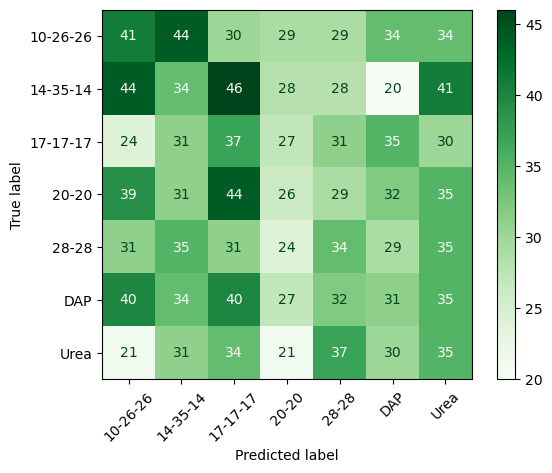

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_fert.classes_)
disp.plot(xticks_rotation=45, cmap='Greens')

In [20]:
len(y_pred)

1600

In [21]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.14875

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19400\3433463862.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=fi_df, palette='Greens_r')


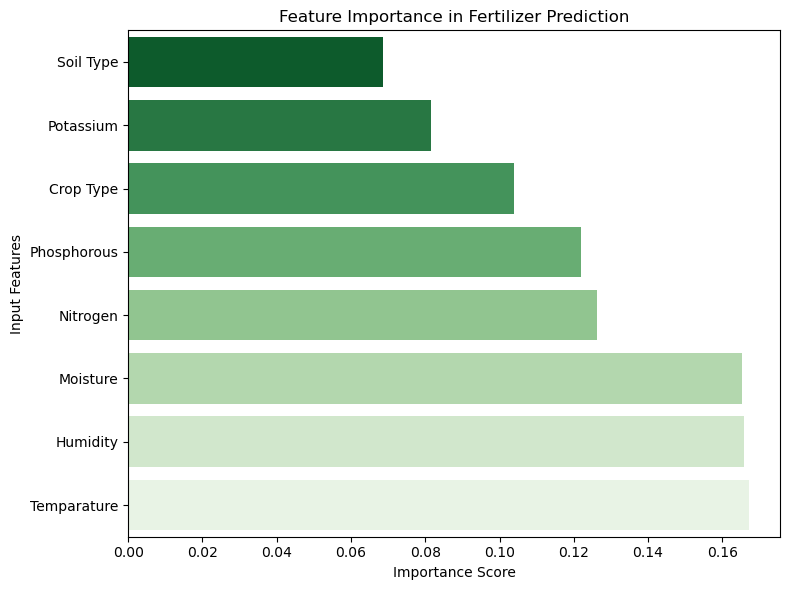

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = model.feature_importances_
features = x.columns

fi_df = pd.DataFrame({'Feature': features, 'Importance': importances})
fi_df = fi_df.sort_values('Importance', ascending=True)

plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=fi_df, palette='Greens_r')
plt.title("Feature Importance in Fertilizer Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Input Features")
plt.tight_layout()
plt.show()


In [23]:
from sklearn.preprocessing import LabelEncoder

# Encode all categorical columns
label_encoders = {}
for col in ['Soil Type', 'Crop Type', 'Fertilizer Name']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define fertilizer encoder for later decoding
fert_encoder = label_encoders['Fertilizer Name']

In [24]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=fert_encoder.classes_)

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


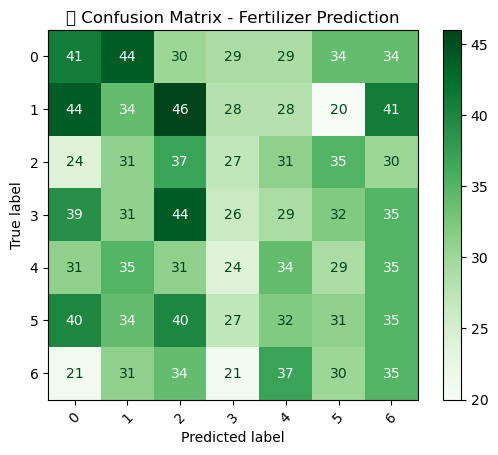

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=fert_encoder.classes_)
disp.plot(cmap='Greens', xticks_rotation=45)
plt.title("Confusion Matrix - Fertilizer Prediction")
plt.show()

In [28]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.17      0.17      0.17       241
           1       0.14      0.14      0.14       241
           2       0.14      0.17      0.16       215
           3       0.14      0.11      0.12       236
           4       0.15      0.16      0.15       219
           5       0.15      0.13      0.14       239
           6       0.14      0.17      0.15       209

    accuracy                           0.15      1600
   macro avg       0.15      0.15      0.15      1600
weighted avg       0.15      0.15      0.15      1600



In [29]:
import joblib
joblib.dump(model,'Crop and soil health.pkl')

['Crop and soil health.pkl']